# Análisis de resultados — ResNet-18 (**Notebook de visualización**)

El **Objetivo** es **cargar y visualizar** los artefactos generados por los scripts ejecutados desde la **terminal** (`prepare_data.py`, `train.py`, `quick_test.py`).
En la carpeta results/ tenemos los archivos `training_results.json`, `training_history.png`, `confusion_matrix.png`, `preds_test.npz`, `best_model.pth`.

In [ ]:
# Notebook para cargas y visualizar los resultados del entrenamiento de ResNet-18

from pathlib import Path
import sys
import subprocess
import platform

# Ruta del proyecto
PROJECT_DIR = Path('/home/TFM_Laura_Monne')
RESULTS_DIR = PROJECT_DIR / 'results'
DATA_DIR    = PROJECT_DIR / 'data'

print('Proyecto :', PROJECT_DIR)
print('Resultados:', RESULTS_DIR)
print('Datos     :', DATA_DIR)

assert PROJECT_DIR.exists(), f"No existe {PROJECT_DIR}. Clona el repo desde TERMINAL antes de usar el notebook."
assert RESULTS_DIR.exists(), f"No existe {RESULTS_DIR}. Entrena desde TERMINAL (python train.py) antes de usar el notebook."

def ensure(pkg_import_name, pip_name=None):
    """Importa o instala con pip si falta."""
    try:
        __import__(pkg_import_name)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pip_name or pkg_import_name])

# Dependencias mínimas para este notebook
ensure("numpy")
ensure("pandas")
ensure("sklearn", "scikit-learn")

Proyecto : /home/TFM_Laura_Monne
Resultados: /home/TFM_Laura_Monne/results
Datos     : /home/TFM_Laura_Monne/data


In [ ]:
import torch
print("Python  :", platform.python_version())
print("PyTorch :", torch.__version__)
print("CUDA ok :", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU     :", torch.cuda.get_device_name(0))

Python  : 3.10.16
PyTorch : 2.7.0+cu126
CUDA ok : True
GPU     : Quadro RTX 6000


In [ ]:
# Comprobaciones de resultados
sorted([p.name for p in RESULTS_DIR.iterdir()])

['.ipynb_checkpoints',
 'best_model.pth',
 'class_report_test.csv',
 'confusion_matrix.png',
 'confusion_matrix_norm.png',
 'per_class_metrics.csv',
 'preds_test.npz',
 'training_history.png',
 'training_results.json',
 'y_prob_test.npy']

In [ ]:
# Métricas globales (training_results.json)
import json
from pprint import pprint

metrics_json = RESULTS_DIR / 'training_results.json'
with open(metrics_json, 'r') as f:
    obj = json.load(f)

print("CONFIG:")
pprint(obj.get('config', {}), sort_dicts=False)
print("\nResultados de Test:")
pprint(obj.get('results', {}), sort_dicts=False)

CONFIG:
{'batch_size': 64,
 'epochs': 120,
 'learning_rate': 0.001,
 'weight_decay': 0.0001,
 'early_stopping_patience': 12,
 'num_workers': 4,
 'use_class_weights': True,
 'grad_clip_norm': 1.0,
 'num_classes': 15}

Resultados de Test:
{'test_loss': 0.314503555600014, 'test_acc': 89.94216746291174}


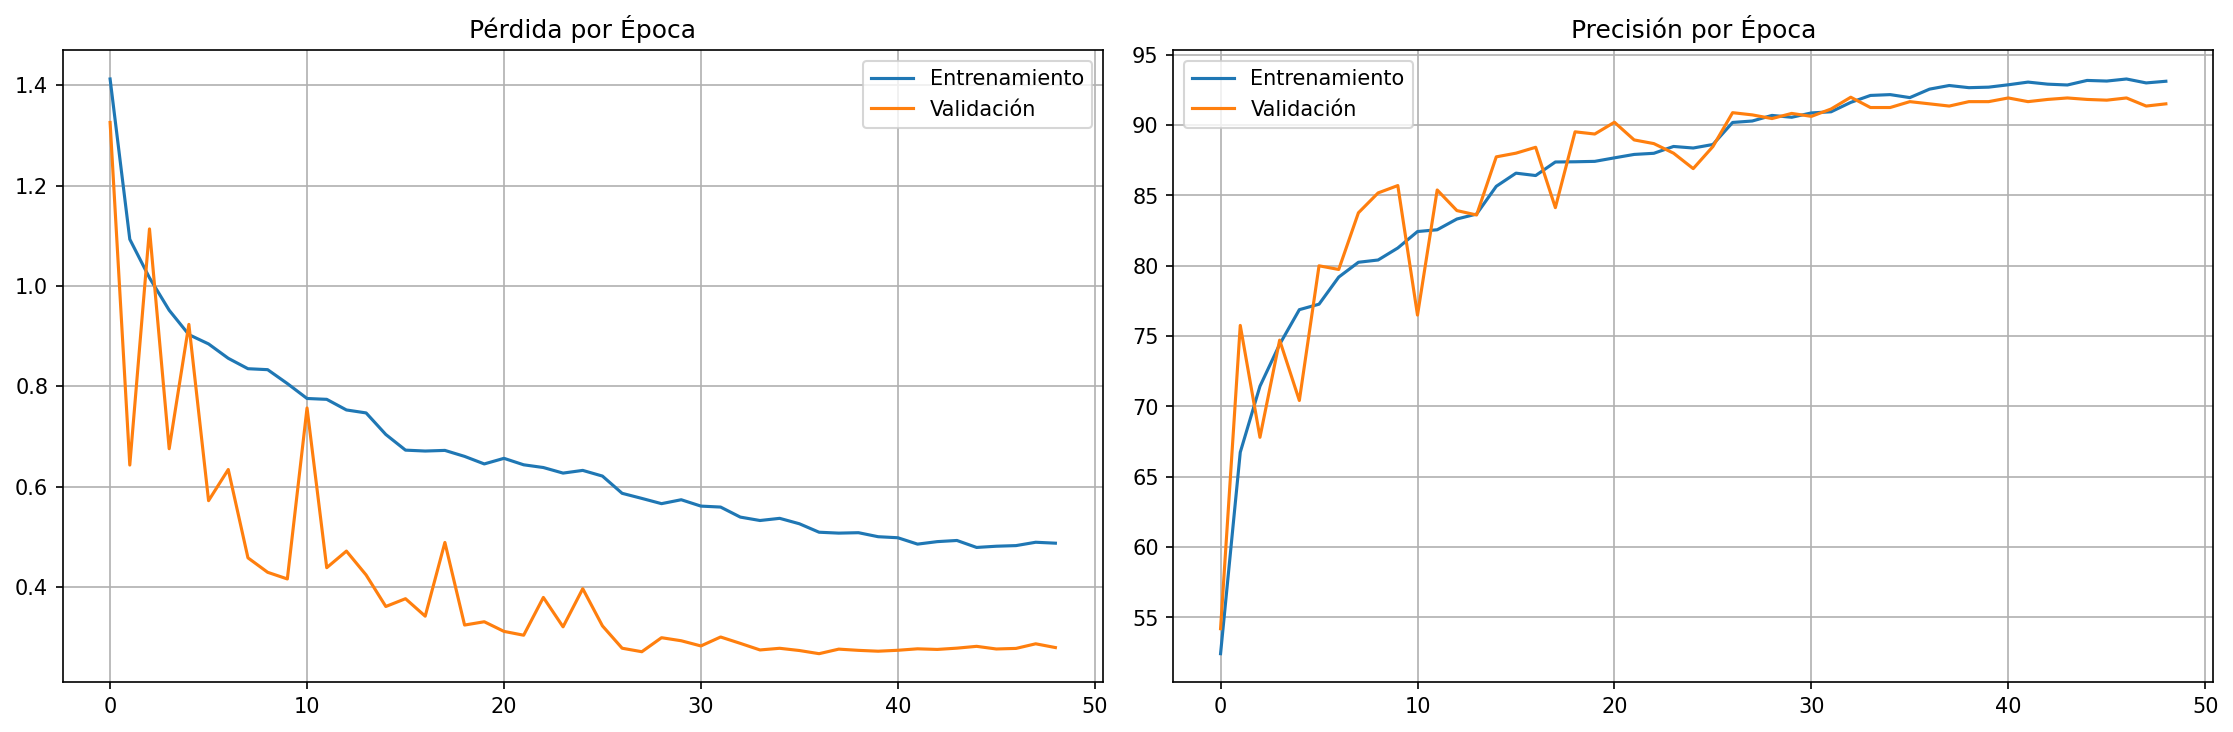

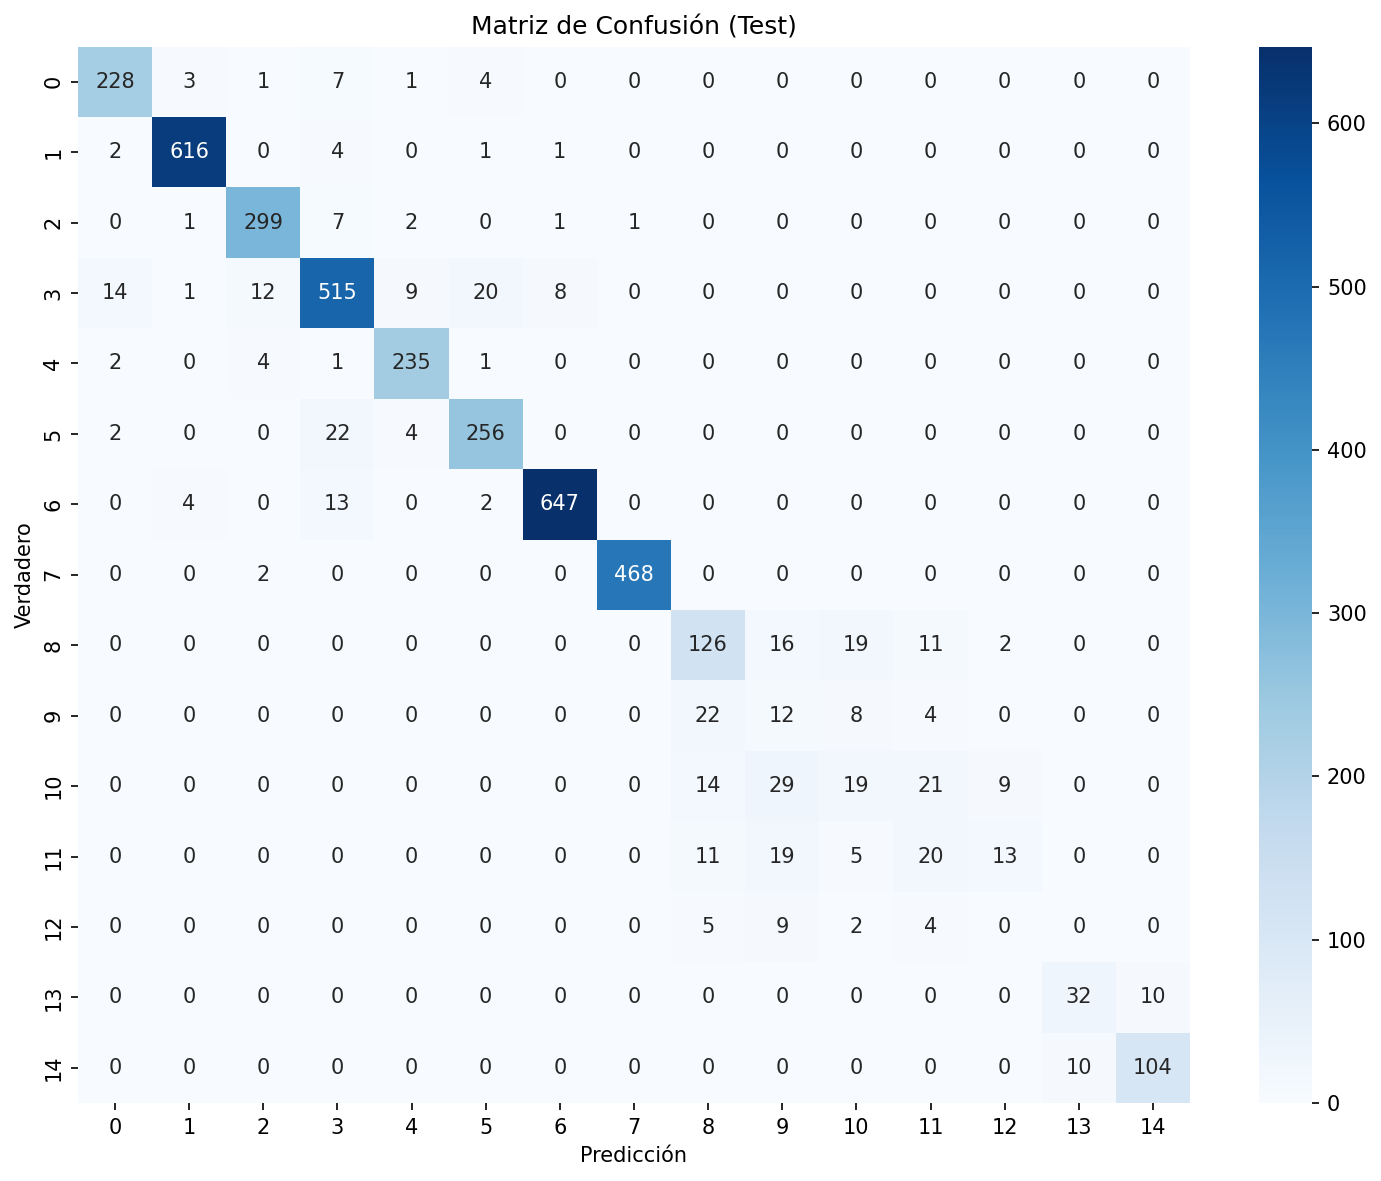

In [ ]:
# Curvas y matriz de confusión

from IPython.display import display, Image

display(Image(filename=str(RESULTS_DIR / 'training_history.png')))
display(Image(filename=str(RESULTS_DIR / 'confusion_matrix.png')))

In [ ]:
#Classification Report + Tabla por clases
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, precision_recall_fscore_support
from IPython.display import display

# Ruta del archivo de predicciones
npz_path = RESULTS_DIR / 'preds_test.npz'

if npz_path.exists():
    # Cargar las predicciones
    data = np.load(npz_path)
    y_true, y_pred = data['y_true'], data['y_pred']

    # Informe general
    target_names = [str(i) for i in sorted(set(y_true))]
    print("\n=== Classification Report ===")
    print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

    # Métricas por clase
    prec, rec, f1, support = precision_recall_fscore_support(
        y_true, y_pred, labels=sorted(set(y_true)), zero_division=0
    )

    df = pd.DataFrame({
        'Clase': sorted(set(y_true)),
        'Precisión': prec,
        'Recall': rec,
        'F1-score': f1,
        'Soporte': support
    }).round(4)

    display(df.head(15))


=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9194    0.9344    0.9268       244
           1     0.9856    0.9872    0.9864       624
           2     0.9403    0.9614    0.9507       311
           3     0.9051    0.8895    0.8972       579
           4     0.9363    0.9671    0.9514       243
           5     0.9014    0.9014    0.9014       284
           6     0.9848    0.9715    0.9781       666
           7     0.9979    0.9957    0.9968       470
           8     0.7079    0.7241    0.7159       174
           9     0.1412    0.2609    0.1832        46
          10     0.3585    0.2065    0.2621        92
          11     0.3333    0.2941    0.3125        68
          12     0.0000    0.0000    0.0000        20
          13     0.7619    0.7619    0.7619        42
          14     0.9123    0.9123    0.9123       114

    accuracy                         0.8994      3977
   macro avg     0.7190    0.7179    0.7158      

,Clase,Precisión,Recall,F1-score,Soporte
0,0,0.9194,0.9344,0.9268,244
1,1,0.9856,0.9872,0.9864,624
2,2,0.9403,0.9614,0.9507,311
3,3,0.9051,0.8895,0.8972,579
4,4,0.9363,0.9671,0.9514,243
5,5,0.9014,0.9014,0.9014,284
6,6,0.9848,0.9715,0.9781,666
7,7,0.9979,0.9957,0.9968,470
8,8,0.7079,0.7241,0.7159,174
9,9,0.1412,0.2609,0.1832,46


In [ ]:
# Rangos por dataset
buckets = {
    'BLOODMNIST' : range(0, 8),     # 8 clases
    'RETINAMNIST': range(8, 13),    # 5 clases (8..12)
    'BREASTMNIST': range(13, 15),   # 2 clases (13..14)
}

for name, idxs in buckets.items():
    idxs = list(idxs)
    mask = np.isin(y_true, idxs)
    acc = (y_pred[mask] == y_true[mask]).mean() if mask.any() else float('nan')
    print(f"{name:12s} -> acc: {acc*100:.2f}%  (n={mask.sum()})")


BLOODMNIST   -> acc: 95.41%  (n=3421)
RETINAMNIST  -> acc: 44.25%  (n=400)
BREASTMNIST  -> acc: 87.18%  (n=156)


In [ ]:
dataset_acc = []
for name, idxs in buckets.items():
    mask = np.isin(y_true, idxs)
    acc = (y_pred[mask] == y_true[mask]).mean() if mask.any() else float('nan')
    dataset_acc.append({'Dataset': name, 'Accuracy (%)': acc * 100, 'Samples': mask.sum()})

df_acc = pd.DataFrame(dataset_acc)
df_acc.to_csv(RESULTS_DIR / 'accuracy_by_dataset.csv', index=False)
display(df_acc)

,Dataset,Accuracy (%),Samples
0,BLOODMNIST,95.410699,3421
1,RETINAMNIST,44.250000,400
2,BREASTMNIST,87.179487,156


In [ ]:
print(f"📊 Precisión global: {obj['results']['test_acc']:.2f}%")
for r in dataset_acc:
    print(f"   - {r['Dataset']:<12s}: {r['Accuracy (%)']:.2f}% ({r['Samples']} muestras)")

📊 Precisión global: 89.94%
   - BLOODMNIST  : 95.41% (3421 muestras)
   - RETINAMNIST : 44.25% (400 muestras)
   - BREASTMNIST : 87.18% (156 muestras)
